<a href="https://colab.research.google.com/github/Aoisama11/Aoisama11/blob/main/Task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please upload the dataset file (CSV format).


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Saving twitter_training.csv to twitter_training (4).csv

Dataset loaded successfully!
Columns in the dataset: Index(['ID', 'Entity', 'Sentiment', 'Text'], dtype='object')
     ID       Entity Sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                Text  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  
Cleaning text data...
Filtering abusive words...
Performing sentiment analysis with VADER...

--- Dataset Summary ---
Total Entries: 74682
Sentiment Distribution:
Sentiment
Positive    35191
Negative    23558
Neutral     15933
Name: count, dtype: int64

--- Sentence Examples ---

Positive Sent

<ipython-input-5-f0389711dd31>:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data["Sentiment"], palette="viridis")


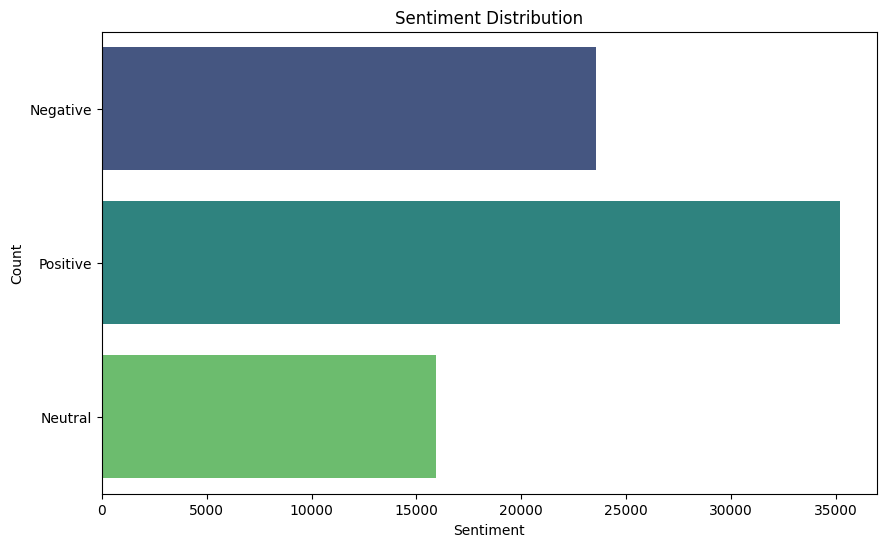

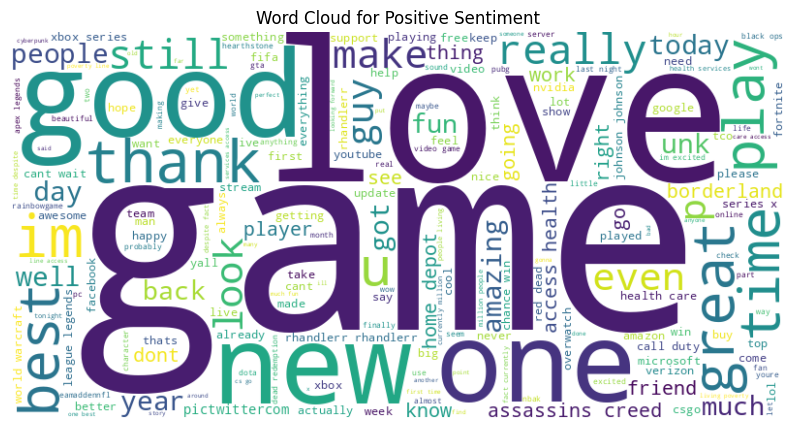

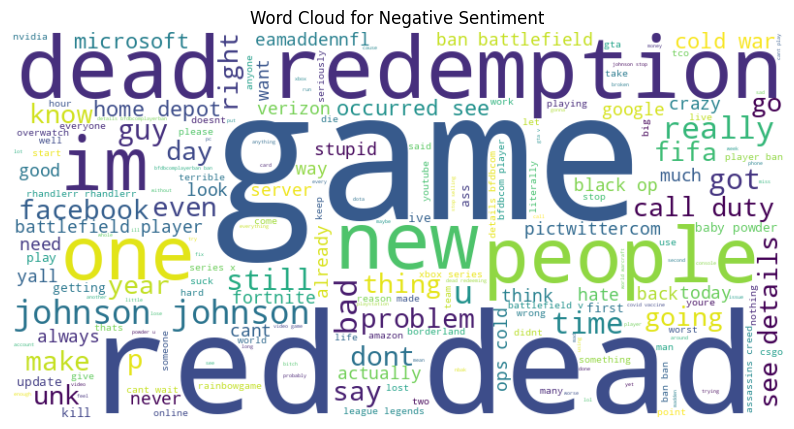

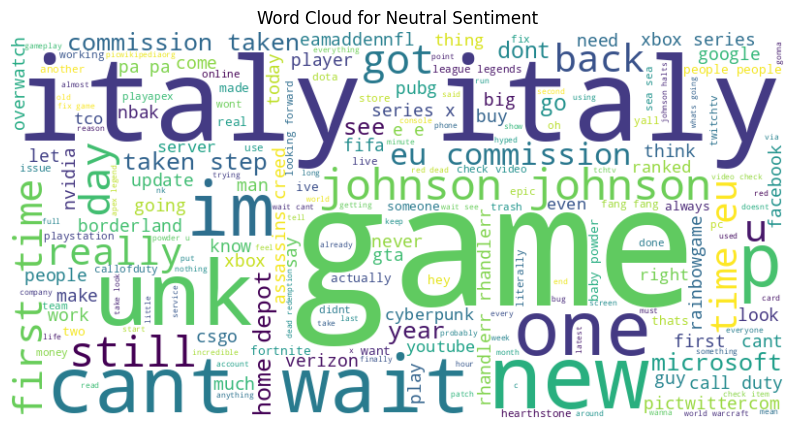

<ipython-input-5-f0389711dd31>:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=word_freq.values, y=word_freq.index, palette="viridis")


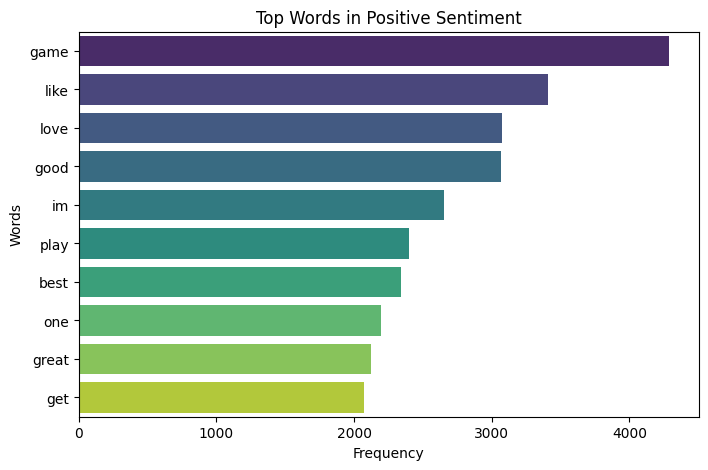

<ipython-input-5-f0389711dd31>:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=word_freq.values, y=word_freq.index, palette="viridis")


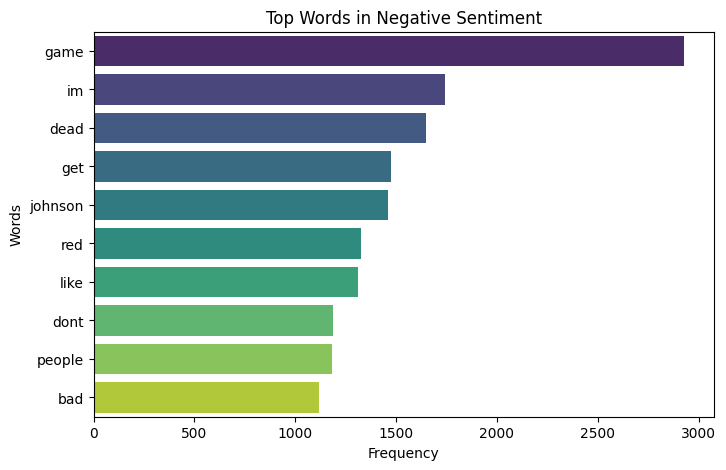

<ipython-input-5-f0389711dd31>:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=word_freq.values, y=word_freq.index, palette="viridis")


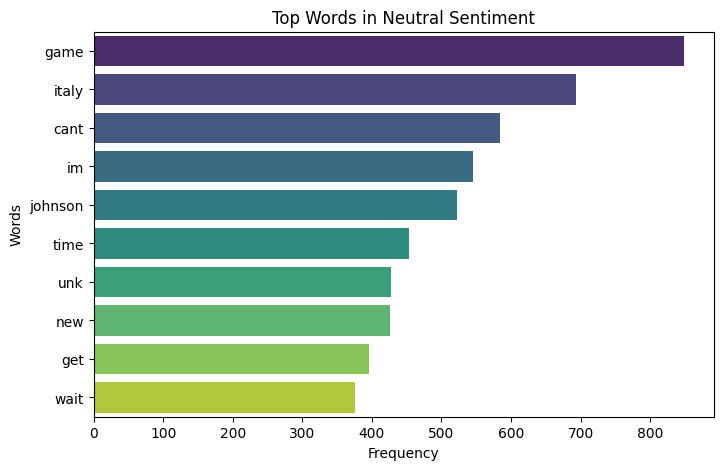


--- Critical Note on Model Limitations ---
1. VADER works well for informal text like social media but may miss subtle nuances.
2. Contextual phrases (e.g., sarcasm) may not be accurately captured.
3. Abusive word filtering is based on a predefined list and may not cover all cases.
4. For academic or professional work, consider using advanced models like BERT or RoBERTa for nuanced analysis.


In [5]:
# Import necessary libraries
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files  # For file upload in Colab

# Download necessary NLTK data
nltk.download("stopwords")
nltk.download("vader_lexicon")

# Step 1: Upload and Load the dataset
def upload_and_load_dataset():
    """
    Allow the user to upload a dataset file and load it into a pandas DataFrame.
    Assigns fixed column names to avoid guessing issues.
    """
    print("Please upload the dataset file (CSV format).")
    uploaded_file = files.upload()  # Open file picker to upload a file
    file_name = list(uploaded_file.keys())[0]  # Get the uploaded file name
    # Load the dataset without relying on headers in the file
    data = pd.read_csv(file_name, header=None)  # Read with no header
    data.columns = ['ID', 'Entity', 'Sentiment', 'Text']  # Assign correct column names
    print("\nDataset loaded successfully!")
    print("Columns in the dataset:", data.columns)  # Print column names
    print(data.head())  # Display the first few rows of the dataset
    return data

# Step 2: Clean the text data
def clean_text(text):
    """
    Clean the text data by removing URLs, special characters, and stopwords.
    Handles NaN values and converts text to string.
    """
    if pd.isnull(text):  # If text is NaN, return empty string
        return ""

    text = str(text)  # Ensure it's a string
    text = re.sub(r"http\S+", "", text)  # Remove URLs
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    text = " ".join([word for word in text.split() if word not in stopwords.words("english")])
    return text

# Step 3: Remove Abusive Words
def filter_abusive_words(text):
    """
    Remove abusive words from the text.
    """
    abusive_words = {"fuck", "shit", "damn", "hell", "fucking", "wtf"}  # Add more as needed
    words = text.split()
    filtered_words = [word for word in words if word not in abusive_words]
    return " ".join(filtered_words)

# Step 4: Perform sentiment analysis with VADER
def analyze_sentiment_vader(text):
    """
    Analyze the sentiment of the text using VADER.
    Returns Positive, Negative, or Neutral based on compound score.
    """
    sia = SentimentIntensityAnalyzer()
    scores = sia.polarity_scores(text)
    if scores["compound"] > 0.05:
        return "Positive"
    elif scores["compound"] < -0.05:
        return "Negative"
    else:
        return "Neutral"

# Step 5: Visualize the sentiments
def visualize_sentiments(data):
    """
    Visualize the sentiment distribution, generate word clouds, and create frequency bar charts.
    """
    # Sentiment distribution
    plt.figure(figsize=(10, 6))
    sns.countplot(data["Sentiment"], palette="viridis")
    plt.title("Sentiment Distribution")
    plt.xlabel("Sentiment")
    plt.ylabel("Count")
    plt.show()

    # Generate word clouds for each sentiment
    for sentiment in ["Positive", "Negative", "Neutral"]:
        text = " ".join(data[data["Sentiment"] == sentiment]["Filtered_Text"])
        wordcloud = WordCloud(background_color="white", width=800, height=400).generate(text)
        plt.figure(figsize=(10, 6))
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.title(f"Word Cloud for {sentiment} Sentiment")
        plt.axis("off")
        plt.show()

    # Frequency bar chart for most common words
    for sentiment in ["Positive", "Negative", "Neutral"]:
        text = " ".join(data[data["Sentiment"] == sentiment]["Filtered_Text"])
        words = text.split()
        word_freq = pd.Series(words).value_counts().head(10)
        plt.figure(figsize=(8, 5))
        sns.barplot(x=word_freq.values, y=word_freq.index, palette="viridis")
        plt.title(f"Top Words in {sentiment} Sentiment")
        plt.xlabel("Frequency")
        plt.ylabel("Words")
        plt.show()

# Step 6: Display dataset summary and sentence examples
def dataset_summary(data):
    """
    Display a summary of the dataset, including sentiment distribution and sentence examples.
    """
    print("\n--- Dataset Summary ---")
    print(f"Total Entries: {len(data)}")
    print("Sentiment Distribution:")
    print(data["Sentiment"].value_counts())

    print("\n--- Sentence Examples ---")
    for sentiment in ["Positive", "Negative", "Neutral"]:
        print(f"\n{sentiment} Sentences:")
        examples = data[data["Sentiment"] == sentiment]["Text"].head(3).tolist()
        for example in examples:
            print(f"- {example}")

# Step 7: Critical Note on Model Limitations
def model_limitations():
    """
    Display a critical note addressing limitations of the sentiment analysis model.
    """
    print("\n--- Critical Note on Model Limitations ---")
    print("1. VADER works well for informal text like social media but may miss subtle nuances.")
    print("2. Contextual phrases (e.g., sarcasm) may not be accurately captured.")
    print("3. Abusive word filtering is based on a predefined list and may not cover all cases.")
    print("4. For academic or professional work, consider using advanced models like BERT or RoBERTa for nuanced analysis.")

# Main function
def main():
    """
    Main function to run the sentiment analysis pipeline.
    """
    # Upload and load the dataset
    data = upload_and_load_dataset()

    # Clean the text data
    print("Cleaning text data...")
    data["Cleaned_Text"] = data["Text"].apply(clean_text)

    # Remove abusive words
    print("Filtering abusive words...")
    data["Filtered_Text"] = data["Cleaned_Text"].apply(filter_abusive_words)

    # Perform sentiment analysis
    print("Performing sentiment analysis with VADER...")
    data["Sentiment"] = data["Filtered_Text"].apply(analyze_sentiment_vader)

    # Display dataset summary
    dataset_summary(data)

    # Visualize the sentiments
    print("\nVisualizing sentiments...")
    visualize_sentiments(data)

    # Display model limitations
    model_limitations()

if __name__ == "__main__":
    main()